In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df['Ram']

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1298     4GB
1299    16GB
1300     2GB
1301     6GB
1302     4GB
Name: Ram, Length: 1303, dtype: object

In [7]:
df['Weight']

0       1.37kg
1       1.34kg
2       1.86kg
3       1.83kg
4       1.37kg
         ...  
1298     1.8kg
1299     1.3kg
1300     1.5kg
1301    2.19kg
1302     2.2kg
Name: Weight, Length: 1303, dtype: object

In [8]:
# Correct data types
df['Inches'] = df['Inches'].astype(float)

df['Price'] = df['Price'].astype(float)


In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [11]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

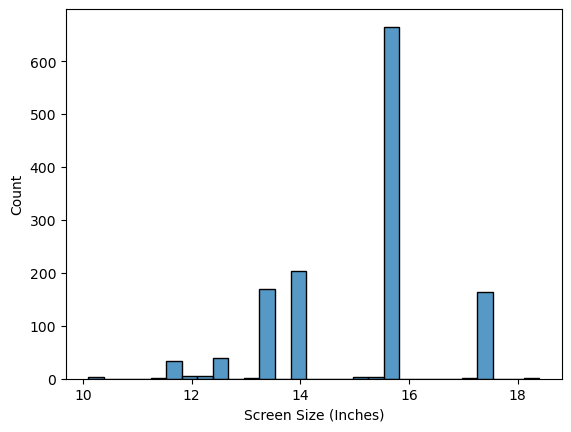

In [12]:
sns.histplot(df['Inches'])
plt.xlabel('Screen Size (Inches)')
plt.show()


<Axes: >

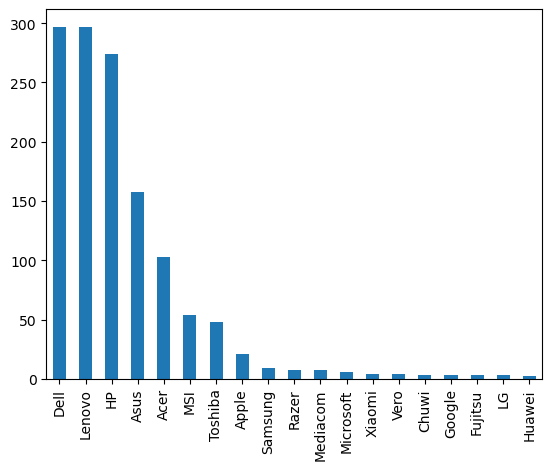

In [13]:
df['Company'].value_counts().plot(kind='bar')

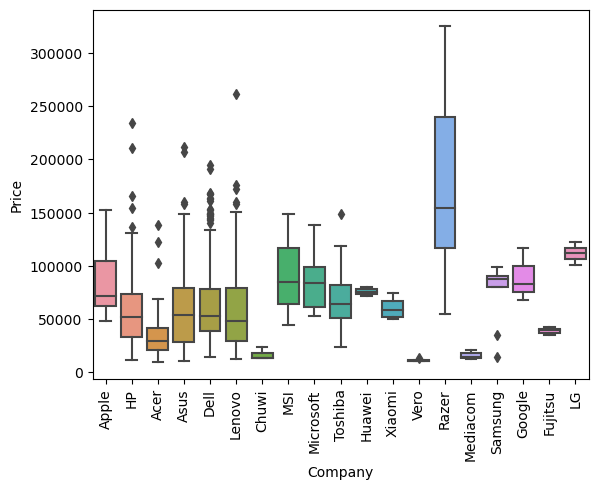

In [14]:
sns.boxplot(x='Company', y='Price', data=df)
plt.xticks(rotation=90)
plt.show()


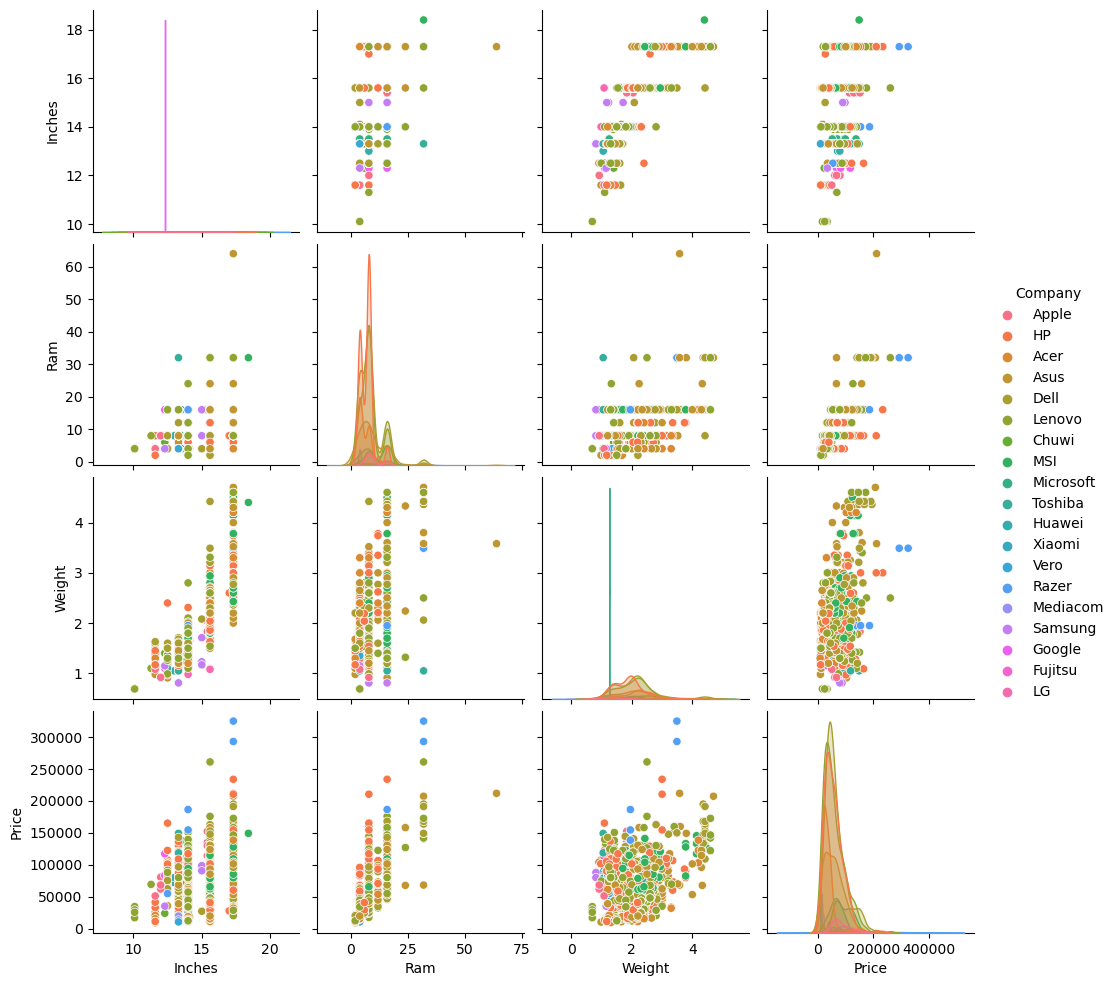

In [15]:
sns.pairplot(df, diag_kind='kde', hue='Company')
plt.show()

C:\Users\btirk\AppData\Local\Temp\ipykernel_10456\663881319.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


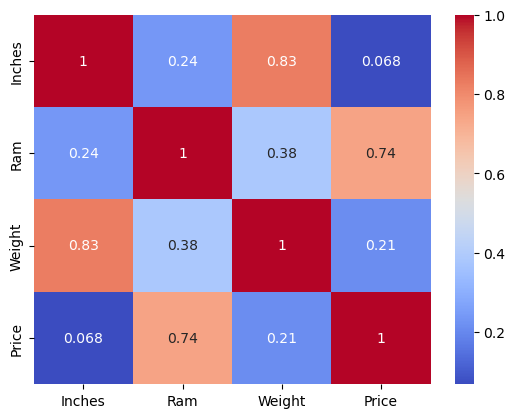

In [16]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [17]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [19]:
df['Ips']=df['ScreenResolution'].apply(lambda x: 1 if 'Ips' in x else 0 )

In [20]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [21]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0


In [22]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'Ips'],
      dtype='object')

In [23]:
df = df.drop(['ScreenResolution'], axis=1)

In [24]:
df = pd.get_dummies(df, columns=['Company', 'TypeName', 'OpSys'], drop_first=True)

In [25]:
df.head()

,Inches,Cpu,Ram,Memory,Gpu,Weight,Price,Touchscreen,Ips,Company_Apple,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [26]:
df['Cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: Cpu, Length: 1303, dtype: object

In [27]:

df['Cpu_Family'] = df['Cpu'].str.extract(r'(Intel Core i[0-9]+|Intel Celeron|Intel Pentium)')[0]


df['Cpu_Speed_GHz'] = df['Cpu'].str.extract(r'(\d+\.\d+)GHz')[0].astype(float)


df = df.drop('Cpu', axis=1)


df = pd.get_dummies(df, columns=['Cpu_Family'], drop_first=True)


In [28]:
df.head()

,Inches,Ram,Memory,Gpu,Weight,Price,Touchscreen,Ips,Company_Apple,Company_Asus,...,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,Cpu_Speed_GHz,Cpu_Family_Intel Core i3,Cpu_Family_Intel Core i5,Cpu_Family_Intel Core i7,Cpu_Family_Intel Pentium
0,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,0,1,0,...,0,0,0,0,1,2.3,0,1,0,0
1,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,1,0,...,0,0,0,0,1,1.8,0,1,0,0
2,15.6,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,0,0,...,1,0,0,0,0,2.5,0,1,0,0
3,15.4,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,0,0,1,0,...,0,0,0,0,1,2.7,0,0,1,0
4,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,0,1,0,...,0,0,0,0,1,3.1,0,1,0,0


In [33]:
df['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [34]:

df['Storage_Type'] = df['Memory'].str.extract(r'(SSD|HDD|Flash Storage)')[0]


In [36]:

df['Storage_Capacity_GB'] = df['Memory'].str.extract(r'(\d+)GB|\d+TB')[0]
df['Storage_Capacity_GB'] = df['Storage_Capacity_GB'].fillna(0)  # Fill NaN values with 0
df['Storage_Capacity_GB'] = df['Storage_Capacity_GB'].replace('TB', '', regex=True)  # Remove 'TB' for terabyte values
df['Storage_Capacity_GB'] = df['Storage_Capacity_GB'].astype(int)

In [40]:
# Drop the original 'Memory' column
df = df.drop('Memory', axis=1)

# One-hot encode the 'Storage_Type' column
df = pd.get_dummies(df, columns=['Storage_Type'], drop_first=True)

In [41]:
df.sample(10)

,Inches,Ram,Gpu,Weight,Price,Touchscreen,Ips,Company_Apple,Company_Asus,Company_Chuwi,...,OpSys_Windows 7,OpSys_macOS,Cpu_Speed_GHz,Cpu_Family_Intel Core i3,Cpu_Family_Intel Core i5,Cpu_Family_Intel Core i7,Cpu_Family_Intel Pentium,Storage_Capacity_GB,Storage_Type_HDD,Storage_Type_SSD
1090,15.6,4,Intel HD Graphics,2.20,20965.1472,0,0,0,0,0,...,0,0,1.6,0,0,0,1,500,1,0
235,15.6,16,AMD Radeon R7 M445,2.36,47898.7200,0,0,0,0,0,...,0,0,2.7,0,0,1,0,256,0,1
950,15.6,8,Nvidia Quadro M1000M,2.00,119826.7200,0,0,0,0,0,...,0,0,2.7,0,0,1,0,8,0,1
713,14.0,4,Intel HD Graphics 500,1.50,15877.4400,0,0,0,1,0,...,0,0,1.1,0,0,0,0,32,0,0
777,14.0,4,Intel HD Graphics 620,1.80,33886.0800,0,0,0,0,0,...,0,0,2.4,1,0,0,0,128,0,1
329,15.6,32,Nvidia GeForce GTX 1050,2.06,140605.9200,1,0,0,0,0,...,0,0,2.8,0,0,1,0,0,0,1
325,14.0,4,Intel HD Graphics 500,1.44,15557.7600,0,0,0,0,0,...,0,0,1.1,0,0,0,0,32,0,0
1098,15.6,4,Intel HD Graphics 405,1.96,26640.0000,0,0,0,0,0,...,0,0,1.6,0,0,0,1,0,1,0
585,17.3,16,Nvidia GeForce GTX 980M,4.50,125154.7200,0,0,0,0,0,...,0,0,2.7,0,0,1,0,128,0,1
433,15.6,16,Nvidia GeForce 940MX,2.30,130269.6000,0,0,0,0,0,...,0,0,2.8,0,0,1,0,512,0,1


In [43]:
df['Gpu']

0       Intel Iris Plus Graphics 640
1             Intel HD Graphics 6000
2              Intel HD Graphics 620
3                 AMD Radeon Pro 455
4       Intel Iris Plus Graphics 650
                    ...             
1298           Intel HD Graphics 520
1299           Intel HD Graphics 520
1300               Intel HD Graphics
1301              AMD Radeon R5 M330
1302               Intel HD Graphics
Name: Gpu, Length: 1303, dtype: object

In [44]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [45]:
df.head()

,Inches,Ram,Gpu,Weight,Price,Touchscreen,Ips,Company_Apple,Company_Asus,Company_Chuwi,...,OpSys_macOS,Cpu_Speed_GHz,Cpu_Family_Intel Core i3,Cpu_Family_Intel Core i5,Cpu_Family_Intel Core i7,Cpu_Family_Intel Pentium,Storage_Capacity_GB,Storage_Type_HDD,Storage_Type_SSD,Gpu brand
0,13.3,8,Intel Iris Plus Graphics 640,1.37,71378.6832,0,0,1,0,0,...,1,2.3,0,1,0,0,128,0,1,Intel
1,13.3,8,Intel HD Graphics 6000,1.34,47895.5232,0,0,1,0,0,...,1,1.8,0,1,0,0,128,0,0,Intel
2,15.6,8,Intel HD Graphics 620,1.86,30636.0000,0,0,0,0,0,...,0,2.5,0,1,0,0,256,0,1,Intel
3,15.4,16,AMD Radeon Pro 455,1.83,135195.3360,0,0,1,0,0,...,1,2.7,0,0,1,0,512,0,1,AMD
4,13.3,8,Intel Iris Plus Graphics 650,1.37,96095.8080,0,0,1,0,0,...,1,3.1,0,1,0,0,256,0,1,Intel


In [46]:
df.drop(columns=['Gpu'],inplace=True)

In [51]:
df['Gpu brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu brand, Length: 1303, dtype: object

In [49]:
df.sample(10)

,Inches,Ram,Weight,Price,Touchscreen,Ips,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,OpSys_macOS,Cpu_Speed_GHz,Cpu_Family_Intel Core i3,Cpu_Family_Intel Core i5,Cpu_Family_Intel Core i7,Cpu_Family_Intel Pentium,Storage_Capacity_GB,Storage_Type_HDD,Storage_Type_SSD,Gpu brand
518,15.6,8,2.04,47365.9200,0,0,0,0,0,0,...,0,2.5,0,1,0,0,256,0,1,Nvidia
730,17.3,16,4.20,103096.8000,0,0,0,0,0,0,...,0,2.6,0,0,1,0,128,0,1,Nvidia
827,14.0,4,1.76,31168.8000,0,0,0,0,0,1,...,0,NaN,1,0,0,0,500,1,0,Intel
821,14.0,4,1.25,58075.2000,0,0,0,0,0,0,...,0,2.5,0,1,0,0,128,0,1,Intel
1279,15.6,8,2.60,47898.7200,0,0,0,0,0,0,...,0,2.6,0,0,1,0,0,1,0,Nvidia
1208,17.3,8,3.30,33513.1200,0,0,0,0,0,0,...,0,2.0,1,0,0,0,0,1,0,Nvidia
715,14.0,8,1.87,45664.6896,0,0,0,0,0,0,...,0,2.5,0,1,0,0,256,0,1,Nvidia
1130,15.6,8,2.04,33513.1200,0,0,0,0,0,0,...,0,2.7,0,0,1,0,0,1,0,Intel
416,13.3,4,1.65,36709.9200,0,0,0,0,0,1,...,0,NaN,1,0,0,0,128,0,1,Intel
906,12.5,8,1.26,79014.2400,0,0,0,0,0,0,...,0,2.7,0,0,1,0,512,0,1,Intel


In [52]:

df = pd.get_dummies(df, columns=['Gpu brand'], prefix='Gpu', drop_first=True)


In [53]:
df.sample(10)

,Inches,Ram,Weight,Price,Touchscreen,Ips,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,Cpu_Family_Intel Core i3,Cpu_Family_Intel Core i5,Cpu_Family_Intel Core i7,Cpu_Family_Intel Pentium,Storage_Capacity_GB,Storage_Type_HDD,Storage_Type_SSD,Gpu_ARM,Gpu_Intel,Gpu_Nvidia
838,14.0,4,1.500,17316.00,0,0,0,0,0,0,...,0,0,0,0,16,0,0,0,1,0
204,15.6,16,2.800,162770.40,0,0,0,0,0,1,...,0,0,0,0,256,0,1,0,0,1
70,13.5,4,1.252,58021.92,1,0,0,0,0,0,...,0,1,0,0,128,0,1,0,1,0
1189,17.3,16,4.200,138474.72,0,0,0,0,0,0,...,0,0,1,0,256,0,1,0,0,1
337,15.6,8,1.840,60952.32,0,0,0,0,0,0,...,0,1,0,0,256,0,1,0,1,0
145,14.0,8,1.250,58554.72,0,0,0,1,0,0,...,0,0,1,0,256,0,1,0,1,0
982,15.6,6,2.200,29250.72,0,0,0,0,0,0,...,0,0,0,0,256,0,1,0,0,0
1176,15.6,4,2.320,43956.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
414,13.3,8,1.270,49443.84,1,0,0,1,0,0,...,0,1,0,0,256,0,1,0,1,0
335,14.0,8,1.480,67559.04,0,0,0,0,0,0,...,0,1,0,0,256,0,1,0,1,0


In [54]:
df.isnull().sum()

Inches                       0
Ram                          0
Weight                       0
Price                        0
Touchscreen                  0
Ips                          0
Company_Apple                0
Company_Asus                 0
Company_Chuwi                0
Company_Dell                 0
Company_Fujitsu              0
Company_Google               0
Company_HP                   0
Company_Huawei               0
Company_LG                   0
Company_Lenovo               0
Company_MSI                  0
Company_Mediacom             0
Company_Microsoft            0
Company_Razer                0
Company_Samsung              0
Company_Toshiba              0
Company_Vero                 0
Company_Xiaomi               0
TypeName_Gaming              0
TypeName_Netbook             0
TypeName_Notebook            0
TypeName_Ultrabook           0
TypeName_Workstation         0
OpSys_Chrome OS              0
OpSys_Linux                  0
OpSys_Mac OS X               0
OpSys_No

In [58]:
df['Cpu_Speed_GHz']

0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1298    2.5
1299    2.5
1300    1.6
1301    2.5
1302    1.6
Name: Cpu_Speed_GHz, Length: 1303, dtype: float64

In [57]:
mean=df['Cpu_Speed_GHz'].mean()
mean

2.3042728019720626

In [60]:
df['Cpu_Speed_GHz'].fillna(mean,inplace=True)

In [61]:
df.isnull().sum()

Inches                      0
Ram                         0
Weight                      0
Price                       0
Touchscreen                 0
Ips                         0
Company_Apple               0
Company_Asus                0
Company_Chuwi               0
Company_Dell                0
Company_Fujitsu             0
Company_Google              0
Company_HP                  0
Company_Huawei              0
Company_LG                  0
Company_Lenovo              0
Company_MSI                 0
Company_Mediacom            0
Company_Microsoft           0
Company_Razer               0
Company_Samsung             0
Company_Toshiba             0
Company_Vero                0
Company_Xiaomi              0
TypeName_Gaming             0
TypeName_Netbook            0
TypeName_Notebook           0
TypeName_Ultrabook          0
TypeName_Workstation        0
OpSys_Chrome OS             0
OpSys_Linux                 0
OpSys_Mac OS X              0
OpSys_No OS                 0
OpSys_Wind

In [62]:
df.sample(10)

,Inches,Ram,Weight,Price,Touchscreen,Ips,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,Cpu_Family_Intel Core i3,Cpu_Family_Intel Core i5,Cpu_Family_Intel Core i7,Cpu_Family_Intel Pentium,Storage_Capacity_GB,Storage_Type_HDD,Storage_Type_SSD,Gpu_ARM,Gpu_Intel,Gpu_Nvidia
185,17.3,16,2.77,82530.72,1,0,0,0,0,1,...,0,0,1,0,512,0,1,0,0,1
328,12.5,8,1.26,71128.80,0,0,0,0,0,0,...,0,0,1,0,256,0,1,0,1,0
27,15.6,8,2.20,42624.00,0,0,0,0,0,1,...,0,1,0,0,256,0,1,0,0,0
717,15.6,4,2.19,15877.44,0,0,0,0,0,0,...,0,0,0,0,500,1,0,0,0,0
78,15.6,4,2.20,28238.40,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
197,13.3,8,1.49,51095.52,0,0,0,0,0,0,...,0,1,0,0,512,0,1,0,1,0
962,15.6,12,2.40,53759.52,0,0,0,0,0,0,...,0,1,0,0,128,0,1,0,0,1
295,15.6,8,3.20,69210.72,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
373,17.3,4,2.60,26053.92,0,0,0,0,0,0,...,0,0,0,0,128,0,1,0,0,0
162,15.6,8,2.13,38787.84,0,0,0,0,0,1,...,0,1,0,0,256,0,1,0,0,0


In [63]:
df.columns

Index(['Inches', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'OpSys_Chrome OS', 'OpSys_Linux',
       'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS', 'Cpu_Speed_GHz',
       'Cpu_Family_Intel Core i3', 'Cpu_Family_Intel Core i5',
       'Cpu_Family_Intel Core i7', 'Cpu_Family_Intel Pentium',
       'Storage_Capacity_GB', 'Storage_Type_HDD', 'Storage_Type_SSD',
       'Gpu_ARM', 'Gpu_Intel', 'Gpu_Nvidia'],
      dtype='object')

In [68]:



df.replace([np.inf, -np.inf], np.nan, inplace=True)

mean_values = df.mean()

df.fillna(mean_values, inplace=True)


In [67]:
df.isnull().sum()

Inches                      0
Ram                         0
Weight                      0
Price                       0
Touchscreen                 0
Ips                         0
Company_Apple               0
Company_Asus                0
Company_Chuwi               0
Company_Dell                0
Company_Fujitsu             0
Company_Google              0
Company_HP                  0
Company_Huawei              0
Company_LG                  0
Company_Lenovo              0
Company_MSI                 0
Company_Mediacom            0
Company_Microsoft           0
Company_Razer               0
Company_Samsung             0
Company_Toshiba             0
Company_Vero                0
Company_Xiaomi              0
TypeName_Gaming             0
TypeName_Netbook            0
TypeName_Notebook           0
TypeName_Ultrabook          0
TypeName_Workstation        0
OpSys_Chrome OS             0
OpSys_Linux                 0
OpSys_Mac OS X              0
OpSys_No OS                 0
OpSys_Wind

In [69]:


X = df.drop(['Price'], axis=1)

y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:


# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [72]:



y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 265455519.03366527
